# ECON408: Assignment 3

Jesse Perla, UBC

## Student Name/Number: Alexander Quach (62679758)

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit just this `ipynb` to Canvas. Do not rename, it associates
    your student number with the submission automatically.

In [ ]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random, StatsPlots

: 

## Question 1

Following the notes on [AR(1)
processes](https://jlperla.github.io/ECON408/lectures/stochastic_dynamics.html#/title-slide)
rather than plotting the distribution as normal instead lets see what
the stationary distribution looks like with simulation.

### Part (a)

From $X_0 = 1.0$ simulate up to $T=1000$ using the process

$$
X_t = a X_{t-1} + b + c W_t
$$

Where $a=0.9, b=0.1, c=0.5$.

In [2]:
T = 1000
X_0 = 1.0
a = 0.9
b = 0.1
c = 0.5
# Add code here

X = zeros(T)
X[1] = 1.0

for t in 2:T
    X[t] = a * X[t-1] + b + c * randn()
end

@show X

X = [1.0, 1.0136601320163394, 1.8434952109222764, 1.6750140222589336, 1.7043162007499275, 1.07600702229952, 0.916652076129272, 1.2448880970994356, 1.1256794337723126, 1.0615560727599533, 1.6458231729470258, 0.5545334295945326, 0.6447715446102182, 1.4588314447197013, 1.905093698070829, 1.1559285650535682, 0.9542565589561081, 1.5736277430469001, 1.6389328026965444, 1.5191071202494237, 1.9126052692207616, 1.8433667297198773, 1.3823386560265236, 1.7430243520819921, 2.691827719783844, 3.458992476671641, 2.2427485506622267, 2.2011452809636136, 2.6156859457899624, 2.8974695176919782, 2.3547329218150566, 1.7000178190771753, 1.4989311230137736, 1.2969722536979387, 0.8967404608137156, 1.3232065228337162, 1.5110841677420783, 2.0102686334827973, 1.8134042802001353, 1.565395160277577, 2.436864390170848, 1.9563540126050536, 2.2472761552912814, 2.043452574646589, 1.8638945688303992, 1.3606784469022677, 0.9794603662906023, 1.426994428959658, 1.3583678838672726, 0.487787156812319, 0.522510634069196, 0.

1000-element Vector{Float64}:
 1.0
 1.0136601320163394
 1.8434952109222764
 1.6750140222589336
 1.7043162007499275
 1.07600702229952
 0.916652076129272
 1.2448880970994356
 1.1256794337723126
 1.0615560727599533
 1.6458231729470258
 0.5545334295945326
 0.6447715446102182
 ⋮
 0.6699316926560727
 0.42192510302321456
 0.8404698486046792
 0.9229853409389983
 0.30754403986104906
 0.6248324887831618
 1.3792218493934914
 1.4427183826528558
 1.0860514291523677
 1.6008280214096942
 1.7580538698447807
 1.8018169569819393

### Part (b)

On the same graph plot the histogram of those simulated values (i.e.,
$\{X_0, \ldots X_T\}$) then plot the density of the stationary
distribution calculated in closed from in [those
notes](https://julia.quantecon.org/introduction_dynamics/ar1_processes.html#equation-mu-sig-star)
(i.e. create a normal distribution with $\mu^* = b/(1-a)$ and
$v^* = c^2/(1 - a^2)$

Hint: `histogram(X, normed=true)` normalizes the empirical draws so they
are a proper PMF.

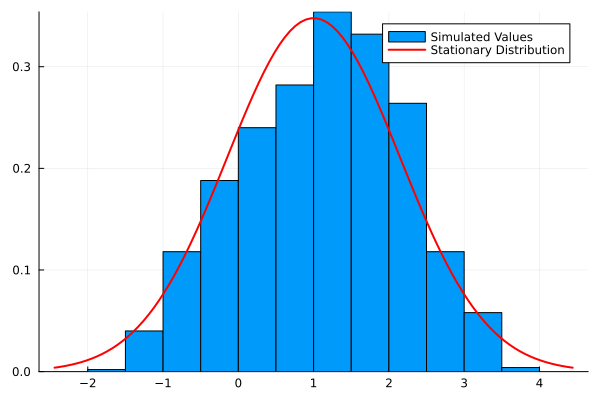

In [3]:
using Plots
using Distributions

# Parameters
a = 0.9
b = 0.1
c = 0.5
T = 1000

u_star = b / (1 - a)
v_star = c^2 / (1 - a^2)

histogram(X, normed=true, label = "Simulated Values")
x_vals = range(u_star - 3 * sqrt(v_star), stop=u_star + 3 * sqrt(v_star), length=100)
y_vals = pdf(Normal(u_star, sqrt(v_star)), x_vals)
plot!(x_vals, y_vals, color=:red, linewidth=2, label="Stationary Distribution")



### Part (c)

What happens if you discard the first 200 observations from that
simulation (i.e., $\{X_{199}, \ldots X_T\}$))?

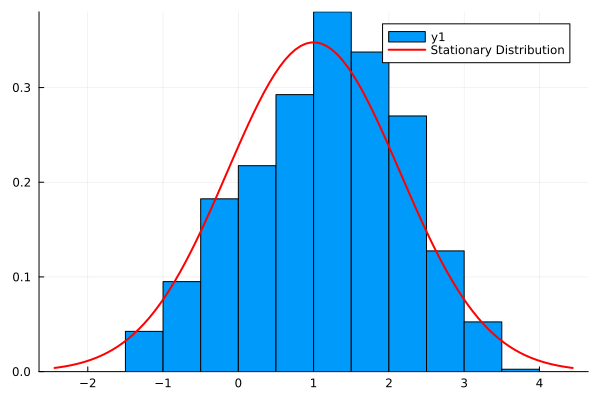

In [4]:
# Add code here
X[201:1000]

histogram(X[201:1000], normed=true)
x_vals = range(u_star - 3 * sqrt(v_star), stop=u_star + 3 * sqrt(v_star), length=100)
y_vals = pdf(Normal(u_star, sqrt(v_star)), x_vals)
plot!(x_vals, y_vals, color=:red, linewidth=2, label="Stationary Distribution")

Do these line up approximately? Explain why it may be better or worse?

The effect of removing these values allows the distribution to move towards its stationary distribution faster, as the process is less influenced by the model's initial conditions.

Due to the nature of the distribution of X_t. Because X_t depends on X_(t-1) and is attitive in nature, removing the first 200 observation moves the would skew the histogram to the left, because the later values generally have greater values than the earlier ones. This slows down the movement towards the stationary distribution. 

Reusable functions, do not modify without clearly annotating your
changes.

In [5]:
function lorenz(v)  # assumed sorted vector
    S = cumsum(v)  # cumulative sums: [v[1], v[1] + v[2], ... ]
    F = (1:length(v)) / length(v)
    L = S ./ S[end]
    return (; F, L) # returns named tuple
end
# Assumes that v is sorted!
gini(v) = (2 * sum(i * y for (i,y) in enumerate(v))/sum(v)
           - (length(v) + 1))/length(v)

gini (generic function with 1 method)

## Question 2

You can create a Pareto distribution with tail parameter `a` and draw
from it with

In [6]:
a = 1.5
d = Pareto(a)
rand(d, 3)

3-element Vector{Float64}:
 1.3266639107889568
 1.0663380334066852
 2.699513004261452

The gini coefficient of a Pareto distribution is given by

$$
G = \frac{1}{2a - 1}
$$

### Part (a)

Draw `N=1000` observations from the Pareto distribution for `a = 1.5`
and calculate the gini coefficient. Compare to the closed-form solution

In [7]:
N = 1000
a = 1.5
# your code here

G = 1/(2*a - 1)
coeff = gini(rand(d, N))
@show G
@show coeff

gini_emp = gini(sort(rand(d, N)))
gini_emp, gini_closed

G = 0.5
coeff = -0.2293498760729375


-0.2293498760729375

### Part (b)

Given a pdf $f(x)$ the cumulative distribution function is given by
$F(x) = \int_{-\infty}^x f(y) dy$. The complementary cumulative
distribution function (CCDF) is given by $F^c(x) = 1 - F(x)$. It starts
at $1$ at the minimum of the support of the distribution and then drops
to $0$ at the maximum of the support.

Take the following code which calculates the CCDF for a distribution and
a range of values `x`.

For this, plot the relationship between the `log(x)` and
`log(ccdf(d,x))` for the distribution below (this is called a [log-log
plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot)). Describe
what you know about this relationship?

plt = Plot{Plots.GRBackend() n=1}


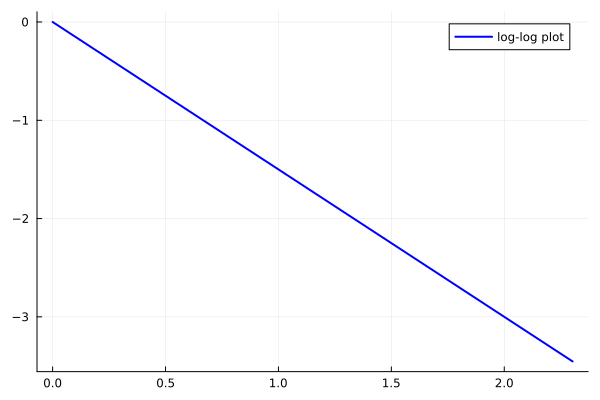

In [8]:
ccdf(d, x) = 1 .- cdf(d, x)

N = 1000
a = 1.5
d = Pareto(a)
max_x = 10.0
num_points = 100
x = range(support(d).lb, max_x, num_points)  # from the lower bound of support to max_x

# edit your code here

plt = plot(log.(x), log.(ccdf(d, x)), label="log-log plot", color=:blue, linewidth=2)
@show plt

The relationship between log(x) and log(ccdf(d,x)) can show whether the underlying distribution follows a power law. If the log-log plot shows a straight line, it indicates that there is a linear relationship, and power law. This means that the probability of observing values greater than x decreases as a power of x, ie extreme events are less likely to occur.

### Part (b)

For the above case, numerically calculate the slope of this line
(easiest is just rise over run). Compare it to the tail parameter `a`.

In [9]:
# your code 

slope = (log(ccdf(d, x[2])) - log(ccdf(d, x[1]))) / (log(x[2]) - log(x[1]))
(-3-0)/(2-0)
@show slope

slope = -1.5


-1.5

### Part (c)

Do we will do the [empirical
counterpart](https://en.wikipedia.org/wiki/Empirical_distribution_function).
Given unweighted vector $\{X_n\}_{n=1}^N$ of observations, we can define
the empirical CDF as

$$
\hat{F}(x) = \frac{\text{number of observations } X_n \leq x}{N}
$$

With the equivalent CCDF as $1 - \hat{F}(x)$.

The code below calculates the empirical CDF for some simulated data.
Adapt it to (1) draw `N` draws from the Pareto distribution above with
`a = 1.5`; (2) plot the same log-log plot as above; and (3) overlay the
plot with the theoretical log-log plot from the previous part to compare
the two.

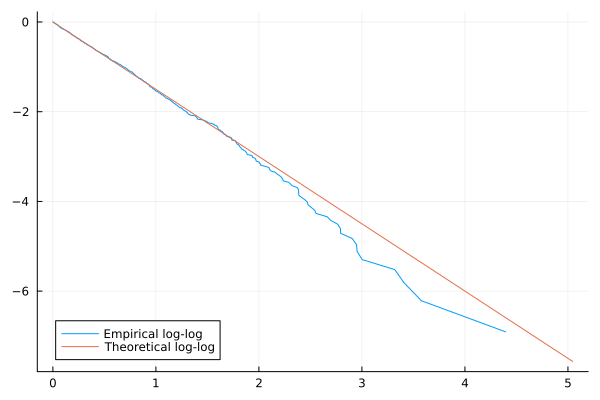

In [10]:
# your code to adapt
N = 1000
x = sort(rand(d,N))  # this draws normals, adapt to our Pareto
F_hat(x) = (1:length(x)) ./ length(x) # the cdf values at the x values are just the counts normalized by the total number of observations  No need to modify.
F(x) = -a * log.(x) + log(1) # Theoretical CDF
plot(log.(x), log.(1 .- F_hat(x)), label="Empirical log-log") # Plot empirical CDF
plot!(log.(x), log.(ccdf.(d, x)), label="Theoretical log-log") # Overlay with theoretical CDF

This shows methods for understanding the tail behavior of distributions.
If it approaches a straight line, then it is called a power-law tail.

### Part (d)

Now lets do the same empirical check on the tail behavior with a
LogNormal distribution - which does not have a power-law tail and the
[Frechet](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution)
distribution - which does.

First, adapt your code above to (1) draw `N=1000` elements from the
`LogNormal(0.0, 0.5)` (2) plot the pdf to get a feel for the
distribution on a reasonable range, then finally (3) plot the
theoretical and empirical log-log plots as you did before.

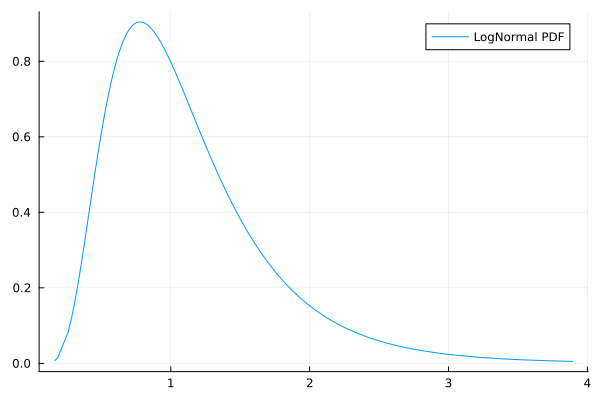

In [11]:
# your code to adapt
N = 1000
d = LogNormal(0.0, 0.5)
x = sort(rand(d,N))
F_hat(x) = (1:length(x)) ./ length(x)
# add code here to plot the pdf
plot(x, pdf(d, x), label = "LogNormal PDF")

# add code for the log-log plot

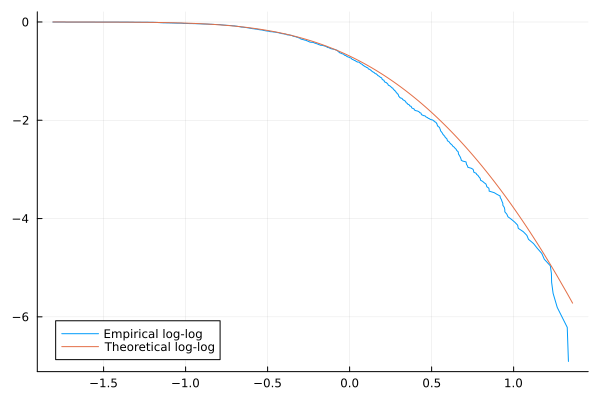

In [12]:
# your code to adapt
# add code for the log-log plot
plot(log.(x), log.(1 .- F_hat(x)), label="Empirical log-log")
plot!(log.(x), log.(ccdf(d, x)), label="Theoretical log-log")

Next do the same thing except with a `Frechet(1.5, 1)` (which has a tail
parameter of 1.5).

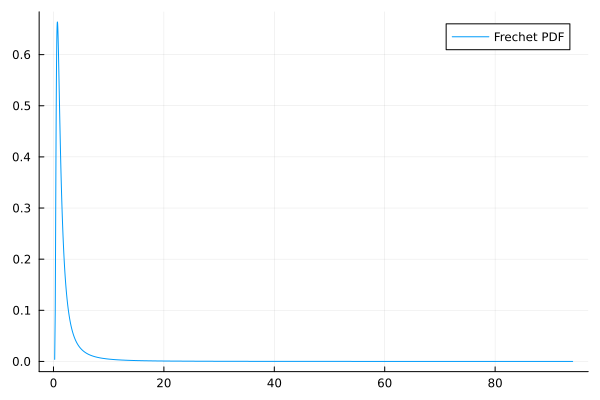

In [13]:
# your code to adapt
N = 1000
d = Frechet(1.5, 1.0)
x = sort(rand(d,N))
F_hat(x) = (1:length(x)) ./ length(x)
# add code here to plot the pdf
plot(x, pdf(d, x), label = "Frechet PDF")

# add code for the log-log plot

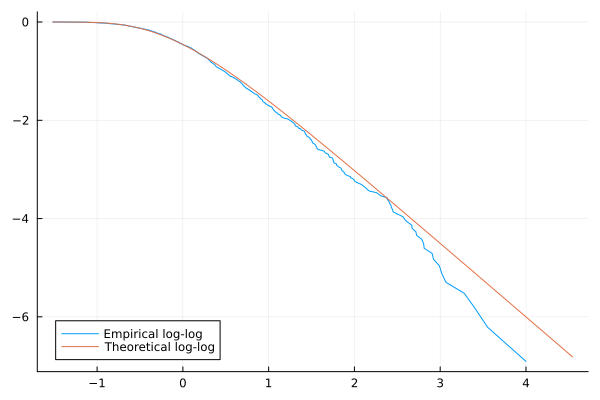

In [14]:
# your code to adapt
# add code for the log-log plot
plot(log.(x), log.(1 .- F_hat(x)), label="Empirical log-log")
plot!(log.(x), log.(ccdf(d, x)), label="Theoretical log-log")

### Part (e)

Comparing your answers in Part (d) and (c) what do you notice is
different theoretically between the log-log plots of distributions with
and without power-law tails? Play around with it and see if you feel you
could just look at an empirical plot and tell if it is a power-law tail
or not?

The main difference between the plots is the slope of the theoretical log-log should approach a straight line (linear). This can be seen in the linearity of the righthand side of the theoretical log-log for the Frechet Distribution and for the Pareto distribution. The log-normal log-log plot however, is not linear, which can be seen in its changing slope. We can see that it decreases more rapidly as x increases. 